
This work has been published in [IEEE [CSICC/2025]](https://ieeexplore.ieee.org/document/10967407):

**Title**: "Persian Text-Image Retrieval: A Framework Based
on Image Captioning and Scalable Vector Search"  
**Authors**: Rasoul Asadian, Alireza Akhavanpour

**DOI**: https://doi.org/10.1109/CSICC65765.2025.10967407


In [1]:
!pip install -qq datasets arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 10.3 MB/s eta 0:00:00


In [2]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoImageProcessor
import matplotlib.pyplot as plt
from PIL import Image
import json
import os
import arabic_reshaper
from bidi.algorithm import get_display


# Loading dataset

In [7]:
def preprocess_image(processor, image_path):
    image = Image.open(image_path).convert('RGB')
    pixel_values = processor(image, return_tensors="pt").pixel_values
    return pixel_values

def generate_caption(model, tokenizer, processor, image):
  with torch.no_grad():
    pixel_values = preprocess_image(processor, image)
    pixel_values = pixel_values.to(model.device)
    output_ids = model.generate(pixel_values)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption

def visualize_caption(inp, caption):
  if isinstance(inp, str):
    inp = Image.open(inp).convert('RGB')

  reshaped_caption = arabic_reshaper.reshape(caption)
  bidi_text = get_display(reshaped_caption)
  plt.figure(figsize=(5, 8))
  plt.imshow(inp)
  plt.axis("off")
  plt.title(bidi_text)
  plt.show()

# Loading trained model

## Model Architecture

PTIR’s captioning model uses DINOv2-base as a vision encoder and GPT2-fa as a Persian-specific text decoder.

In [4]:
model_name = "shenasa/persian-image-captioning"
caption_model = VisionEncoderDecoderModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token_id = tokenizer.eos_token_id
image_processor = AutoImageProcessor.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/932M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
caption_model.to(device)

VisionEncoderDecoderModel(
  (encoder): Dinov2Model(
    (embeddings): Dinov2Embeddings(
      (patch_embeddings): Dinov2PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Dinov2Encoder(
      (layer): ModuleList(
        (0-11): 12 x Dinov2Layer(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attention): Dinov2Attention(
            (attention): Dinov2SelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): Dinov2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (layer_scale1): Dinov2LayerS

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


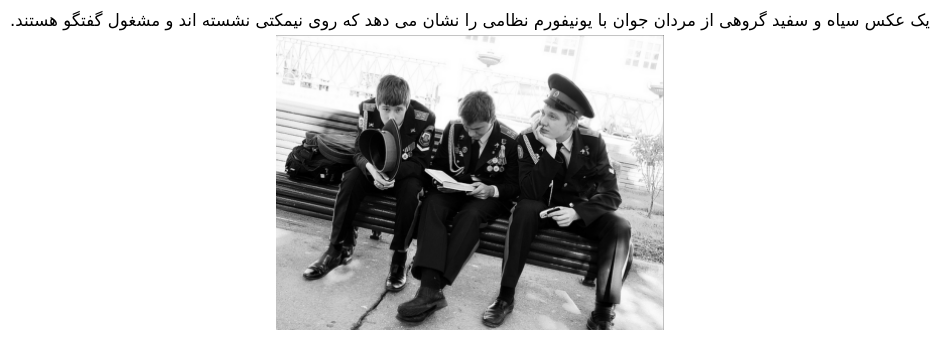

In [8]:
idx = 55
image = '/content/sarbaz.png'
generated_caption = generate_caption(caption_model, tokenizer, image_processor, image)
visualize_caption(image, generated_caption)

In [11]:
!wget https://rooziato.com/wp-content/uploads/2024/11/Untitled-3-1024x682.jpg

--2025-08-23 11:44:06--  https://rooziato.com/wp-content/uploads/2024/11/Untitled-3-1024x682.jpg
Resolving rooziato.com (rooziato.com)... 185.13.230.132
Connecting to rooziato.com (rooziato.com)|185.13.230.132|:443... ^C


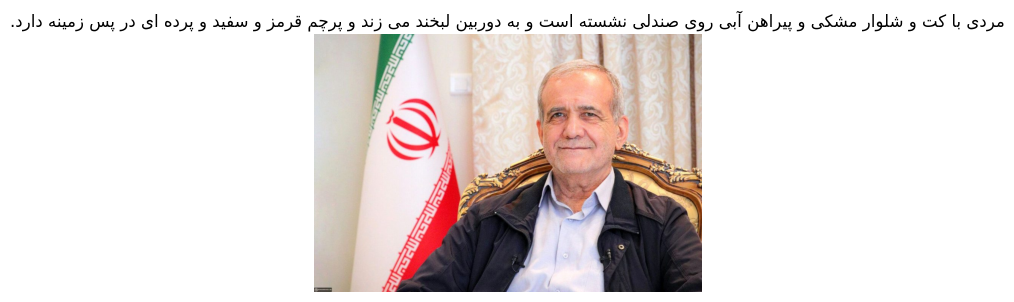

In [12]:
idx = 55
image = '/content/Untitled-3-1024x682.jpg'
generated_caption = generate_caption(caption_model, tokenizer, image_processor, image)
visualize_caption(image, generated_caption)

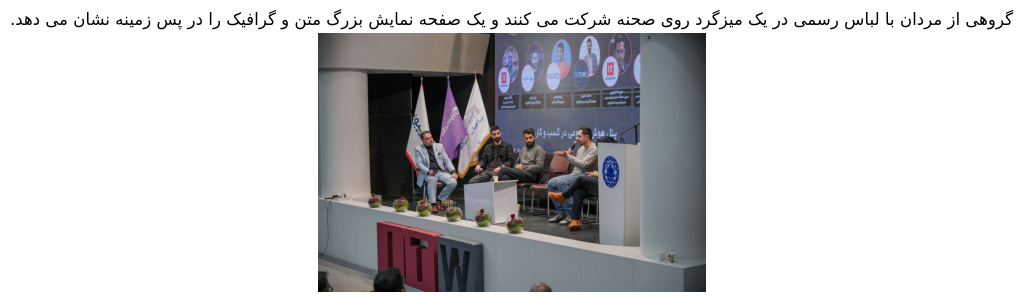

In [14]:
idx = 55
image = '/content/39-scaled.jpg'
generated_caption = generate_caption(caption_model, tokenizer, image_processor, image)
visualize_caption(image, generated_caption)